# Plot the data for further exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def abbreviate_number(num):
    """Format large numbers into abbreviated form (e.g., 1,000,000 -> 1.0M)."""
    if np.isnan(num) or num is None:
        return '0'
    abs_num = abs(num)
    if abs_num >= 1e6:
        return f"{num / 1e6:.1f}M"
    if abs_num >= 1e3:
        return f"{num / 1e3:.1f}K"
    return f"{num:.1f}"

## Scatter Plot of avg_expandEvts vs. final_expandEvts
This function creates a scatter plot showing the correlation between avg_expandEvts and final_expandEvts, colored by censored status, using a logarithmic scale.

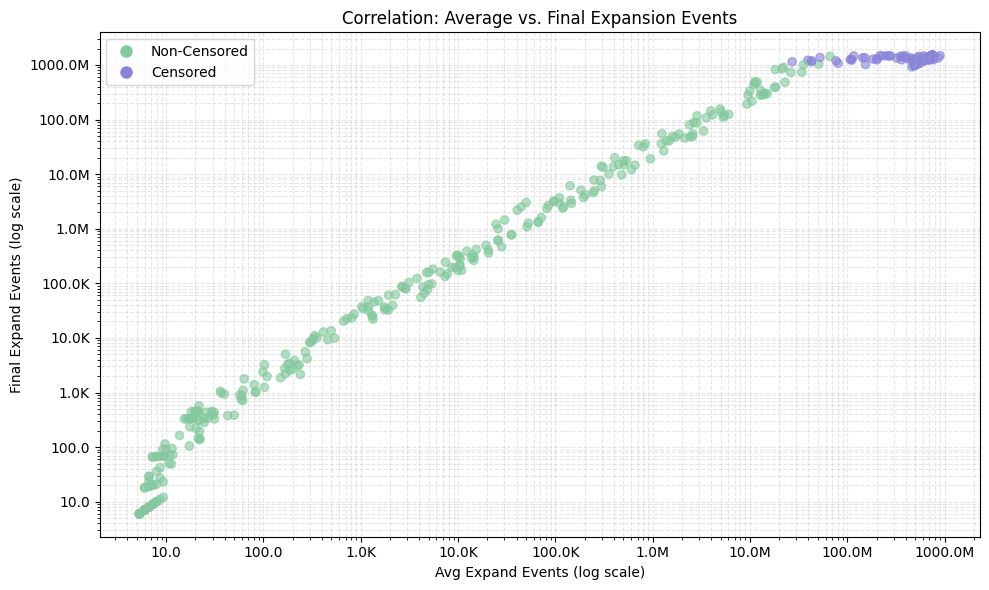

In [5]:
def plot_avg_vs_final_expand_events(file_path):
    """
    Create a scatter plot of avg_expandEvts vs final_expandEvts, colored by censored status.
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df = df.dropna(subset=['avg_expandEvts', 'final_expandEvts', 'censored'])
    df['avg_expandEvts'] = pd.to_numeric(df['avg_expandEvts'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df['censored'] = pd.to_numeric(df['censored'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    colors = df['censored'].map({0: '#82ca9d', 1: '#8884d8'})  # Green for non-censored, purple for censored
    plt.scatter(df['avg_expandEvts'], df['final_expandEvts'], c=colors, alpha=0.6)
    
    # Set logarithmic scales
    plt.xscale('log')
    plt.yscale('log')
    
    # Customize axes
    plt.xlabel('Avg Expand Events (log scale)')
    plt.ylabel('Final Expand Events (log scale)')
    plt.title('Correlation: Average vs. Final Expansion Events')
    
    # Add custom tick formatter
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: abbreviate_number(x)))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Non-Censored', markerfacecolor='#82ca9d', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Censored', markerfacecolor='#8884d8', markersize=10)
    ]
    plt.legend(handles=legend_elements)
    
    # Add grid
    plt.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_avg_vs_final_expand_events("structured_data.xlsx")

## Bar Chart of Mean final_expandEvts by n
This function creates a bar chart showing the mean final_expandEvts for each problem size n.

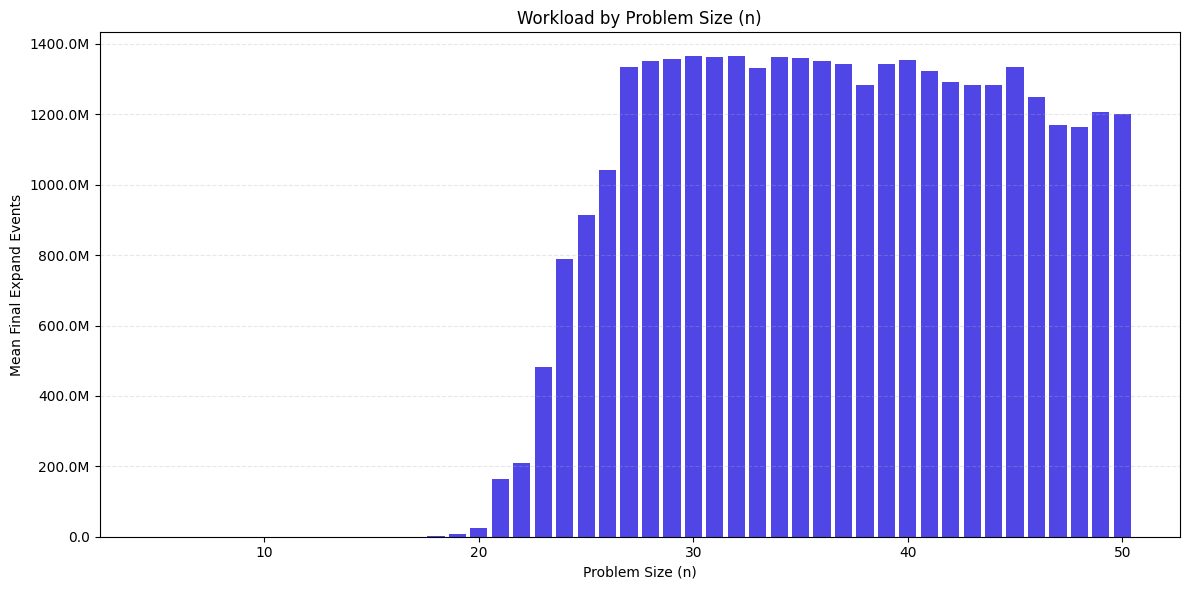

In [7]:
def plot_workload_by_n(file_path):
    """
    Create a bar chart of mean final_expandEvts by problem size (n).
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['n'] = pd.to_numeric(df['n'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Aggregate data by n
    aggregated = df.groupby('n')['final_expandEvts'].mean().reset_index()
    aggregated = aggregated.sort_values('n')
    
    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(aggregated['n'], aggregated['final_expandEvts'], color='#4f46e5')
    
    # Customize axes
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Mean Final Expand Events')
    plt.title('Workload by Problem Size (n)')
    
    # Add custom tick formatter for y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add grid
    plt.grid(True, which="major", axis='y', ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_workload_by_n("structured_data.xlsx")

## Scatter Plot of n vs. final_expandEvts
This function creates a scatter plot showing final_expandEvts vs. problem size n, using a logarithmic scale for the y-axis.

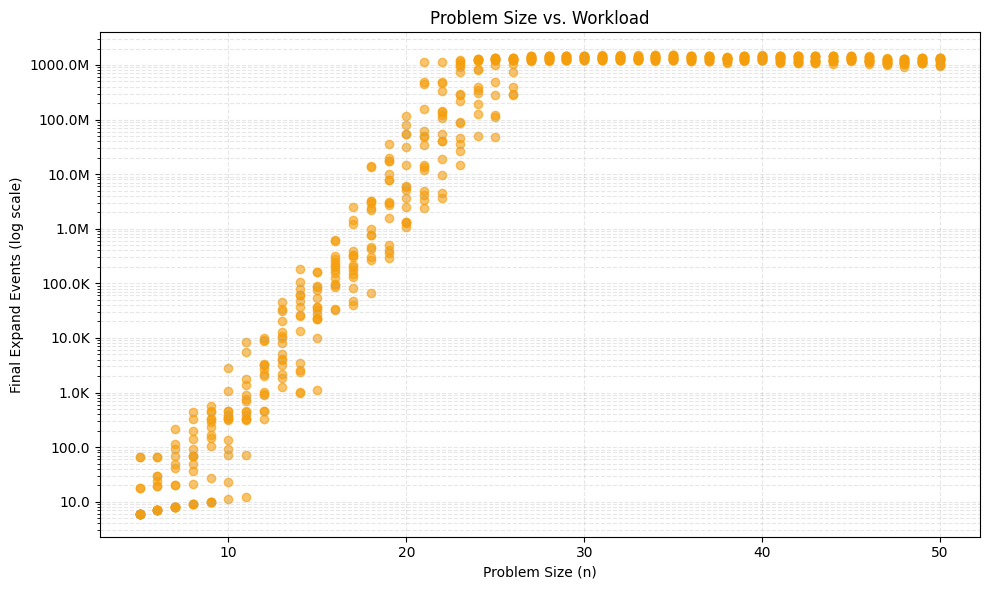

In [9]:
def plot_n_vs_final_expand_events(file_path):
    """
    Create a scatter plot of problem size (n) vs final_expandEvts.
    
    Parameters:
    file_path (str): Path to structured_data.xlsx
    """
    # Load and clean data
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['n'] = pd.to_numeric(df['n'], errors='coerce').fillna(0)
    df['final_expandEvts'] = pd.to_numeric(df['final_expandEvts'], errors='coerce').fillna(0)
    df = df[df['final_expandEvts'] > 0]  # Filter out zero or invalid values
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['n'], df['final_expandEvts'], color='#f59e0c', alpha=0.6)
    
    # Set logarithmic scale for y-axis
    plt.yscale('log')
    
    # Customize axes
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Final Expand Events (log scale)')
    plt.title('Problem Size vs. Workload')
    
    # Add custom tick formatter for y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: abbreviate_number(y)))
    
    # Add grid
    plt.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_n_vs_final_expand_events("structured_data.xlsx")